# PHS 597: Homework 01

Xingyan "David" Wang

ID: 949211534

Due: Feb. 17th, 2020

## Introduction

In [2]:
# Load some common packages
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras as keras
import numpy as np
import pandas as pd
from keras import models
from keras import layers
from keras.utils import to_categorical
from scipy import stats

This homework requires us to use MNIST (Modified National Institute of Standards and Technology) dataset to correcly classify the hand-written numbers. 

There are 4 main data sets for this project. These datasets can be directly imported from keras package in Python. We loaded these 4 data sets into train_images, train_labels, test_images and test_labels using the following programming. 

In [36]:
# Import data

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

These two datasets are gray-scale images of hand-drawn digits, from zero through nine. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.
There are 4 data sets: train_images, train_labels, test_images and test_labels. train_images include xxx observations and their labels are instored in train_labels. Similarly, we have test_images and test_labels
The train.csv data set contain 42,000 observations with labels. Each labels is the truth for the number that represented. 

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

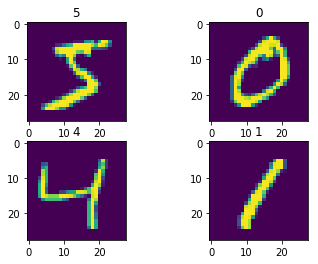

In [3]:
fig, axs = plt.subplots(2,2)
for ii in np.arange(0,2):
    for jj in np.arange(0,2):
        axs[ii,jj].imshow(train_images[ii*2+jj,:,:])
        axs[ii,jj].title.set_text(train_labels[ii*2+jj])

Furthermore, we can check the dimension of each dataset. First the dimension of training data set.

In [4]:
train_images.shape

(60000, 28, 28)

Then we can see the labels (or the "truth") of the training data set. 

In [5]:

len(train_labels)

60000

Additionally, we can use histogram to see the distribution of these numbers in the training data set

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

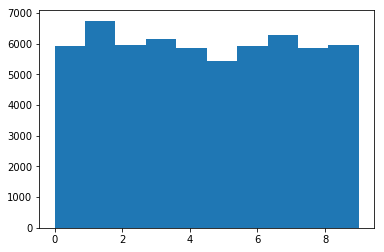

In [20]:
plt.hist(train_labels,bins = 10)

From the histogram, we can see that all 10 values are quite uniformaly distributed, ranging from 5421 to 6742. Then we can see the same for the test data set. 

(10000, 28, 28)


(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

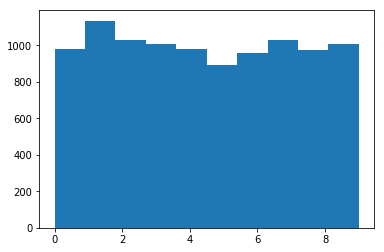

In [21]:
print(test_images.shape)
len(test_labels)
plt.hist(test_labels,bins = 10)

Similarly, we see a similary pattern in the test dataset. 

Before we start model our data, we need to do some data standarization to make sure that there is no outliers gonna influence the analysis. Additionally, we need to reshape the data into array, so that it will be easier for later analysis. 

In [37]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Back up data set so that we can initialize data sets to their original 
train_images_bp = train_images
train_labels_bp = train_labels
test_images_bp = test_images
test_labels_bp = test_labels

## Nerual Network

As we shown in the class, this question can be solved using nerual network approach. 

In [38]:
# Import necessary modules
from keras import models
from keras import layers


from keras.utils import to_categorical
# make the data type into catgeorical level
# make it 10 rows and 2 columns
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Then we can fit nerual network. Due to the large sample size and the limitation of my PC's calcualtion ability. The

In [39]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.2527 - accuracy: 0.9265
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.1041 - accuracy: 0.9686
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0680 - accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0485 - accuracy: 0.9849
Epoch 5/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.0361 - accuracy: 0.9896


Training set prediction accuracy: 

In [40]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
print(train_acc)

60000/60000 [==============================] - 1s 20us/step
0.9925000071525574


Test set prediction accuracy:

In [41]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 0s 20us/step
0.9794999957084656


## Machine Learning Methods

For this section, we would like to use some common machine learning techniques to perform this work. 

### KNN (K-Nearest Neighbour)

In [7]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initialize data set
train_images = train_images_bp
train_labels = train_labels_bp
test_images = test_images_bp
test_labels = test_labels_bp

In [145]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [146]:
knn.fit(train_images, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [147]:
print(knn.score(train_images, train_labels))
print(knn.score(test_images, test_labels)) 

0.9819166666666667
0.9688


From above, we can see that the accuarcy for KNN methods on test datat set is 0.9688. 
One thing for KNN method is that we need to pre-specify the number of neighbours, i.e. 5 in the upper case. However, this value can influence the model performance of the predicition in the test data set. A lower value can result in prefect predicition in the training set but may results in the a bad prediction in the test data, which is usually refered to overfitting in the test data set. Next, we would like to see the influence of this value. 

First, we created a sequence of number around 5 to represent number of neighbourhood that we will consider. Additionally, we create two empty arrary train_accuracy and test_accuracy to store future accuracy for training data set and test data set. 

In [5]:
neighbors = np.arange(1, 4) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
print(neighbors)

[1 2 3]


Next, we would like to loop over different values of K to build KNN models and evalue the accuracy for test data set. Training data set accuracy is hard to estimate because the large sample size. So, we will not consider here.

In [8]:
# Loop over different K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') 
    knn.fit(train_images, train_labels)
      
    # Compute traning and test data accuracy 
    
    test_accuracy[i] = knn.score(test_images, test_labels)
    print(k)

1
2
3


In [9]:
print(test_accuracy)

[0.9691 0.9627 0.9705]




### SVM (Support Vector Machine)

Next, we would like to use SVM (Suppor vector machine) approach to perform this job. 

In [26]:
# Import necessary modules 
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
# Initialize data set
train_images = train_images_bp
train_labels = train_labels_bp
test_images = test_images_bp
test_labels = test_labels_bp

In [33]:
svc = LinearSVC()
svc.fit(train_images, train_labels)

/Users/xingyanwang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

After building the SVM, we can first look at the prediction accuracy on the training dataset: 

In [34]:
train_pred = svc.predict(train_images)
train_prediction = confusion_matrix(train_labels, train_pred)

print(train_prediction)
print(np.trace(train_prediction)/np.sum(train_prediction))

[[5798    1   13    9    9   18   28    4   36    7]
 [   1 6601   30   11    7   23    2   11   48    8]
 [  39   47 5416   86   57   26   58   70  140   19]
 [  20   26  153 5498   11  170   20   53  118   62]
 [   9   23   29    7 5490   15   31   14   53  171]
 [  53   21   40  166   60 4784   97   17  122   61]
 [  30   12   29    3   26   79 5710    2   24    3]
 [  12   21   55   13   52   10    6 5909   17  170]
 [  47  131   71  148   43  167   50   27 5077   90]
 [  27   19   27  109  187   44    2  195   46 5293]]
0.9262666666666667


Next, we would like to see the prediction performance on the test dataset. 

In [35]:
test_pred = svc.predict(test_images)
prediction = confusion_matrix(test_labels, test_pred)
# prediction = pd.DataFrame(prediction)
print(prediction)

[[ 961    0    2    1    1    4    6    3    1    1]
 [   0 1112    3    2    0    1    5    1   11    0]
 [  11   11  913   18   10    4   13   12   37    3]
 [   4    0   18  919    2   22    5   12   20    8]
 [   1    4    5    4  913    0    9    3    5   38]
 [   9    2    0   40   12  767   18    7   29    8]
 [   7    4    7    2    5   21  909    1    2    0]
 [   2    8   22    6    7    1    1  948    4   29]
 [  11   13    8   21   14   31    8   13  843   12]
 [   7    8    2   15   31   12    0   26   12  896]]


We can see from the above matrix that the diagonal elements are the correctly classified elements, while the off diagnoal are those mis-correclty classified elements. Based on this, we can calculate the accuracy of SVM for the test data set: 

In [36]:
np.trace(prediction)/np.sum(prediction)

0.9181

One question for SVM is that different loss functions may result in different results. Next, we would like to examine the influence of these two parameters. 

In [47]:
# Define penalty and loss function
PEN = ['l2']
LOSS = ['hinge','squared_hinge' ]
print(PEN)
print(LOSS)

# Initialize the accuracy matrix to be empty
train_accuracy = np.empty((len(PEN),len(LOSS)))
test_accuracy = np.empty((len(PEN),len(LOSS))) 


['l2']
['hinge', 'squared_hinge']


In [51]:
for i, j in enumerate(PEN): 
    for k, l in enumerate(LOSS): 
        svc = LinearSVC(penalty = PEN[i], loss= LOSS[k], dual = True, max_iter = 2000)
        svc.fit(train_images, train_labels)
        
        train_pred = svc.predict(train_images)
        train_prediction = confusion_matrix(train_labels, train_pred)
        
        train_accuracy[i, k] = np.trace(train_prediction)/np.sum(train_prediction)
        
        test_pred = svc.predict(test_images)
        test_prediction = confusion_matrix(test_labels, test_pred)
        
        test_accuracy[i, k] = np.trace(test_prediction)/np.sum(test_prediction)
        

/Users/xingyanwang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/xingyanwang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
print(train_accuracy)
print(test_accuracy)

[[0.92973333 0.9263    ]]
[[0.9219 0.9183]]


Notice that, for training data set and test data set accuracy, under L2 penalty, hinge loss function would yields a higher accuracy than squared hinge loss function. 

## Regression Tree

Next, we would like to examine the regression tree method. 

In [53]:
# Import necessary modules 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import confusion_matrix

In [ ]:
# Initialize data set
train_images = train_images_bp
train_labels = train_labels_bp
test_images = test_images_bp
test_labels = test_labels_bp

Fit regression tree model: 

In [54]:
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(train_images, train_labels) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

Similarly, we first look at confusion matrix and prediction accuracy on training set: 

In [63]:
train_prediction = regressor.predict(train_images) 
confusion = confusion_matrix(train_labels, train_prediction)
print(confusion)

np.trace(confusion)/np.sum(confusion)

[[5923    0    0    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   0    0 5958    0    0    0    0    0    0    0]
 [   0    0    0 6131    0    0    0    0    0    0]
 [   0    0    0    0 5842    0    0    0    0    0]
 [   0    0    0    0    0 5421    0    0    0    0]
 [   0    0    0    0    0    0 5918    0    0    0]
 [   0    0    0    0    0    0    0 6265    0    0]
 [   0    0    0    0    0    0    0    0 5851    0]
 [   0    0    0    0    0    0    0    0    0 5949]]


1.0

Interestingly, we found out that all the labels are correctly classified, which yeilds the accuracy to be 100% correct. However, this indicates that we might be overfitting the model. It turns out in Python, if we do not specify the maximum depth of the tree, then it will expanded until all leaves are pure, which is overfitting. We can take a look at the predicition accuracy on the test data set: 

In [64]:
test_prediction = regressor.predict(test_images) 
test_confusion = confusion_matrix(test_labels, test_prediction)
print(test_confusion)

np.trace(test_confusion)/np.sum(test_confusion)

[[ 902    2   13   14   10   14   10    5    7    3]
 [   1 1091   16    5    5    6    2    5    2    2]
 [  19   23  845   41   11   13   16   24   27   13]
 [  15    8   23  816   15   42   12   28   34   17]
 [   6    6   19   14  840   17   19   11   21   29]
 [  18    9    8   46   15  695   30   13   34   24]
 [  18    3   14    6   34   29  832    4   15    3]
 [   3   16   24   13   10    9    2  905   18   28]
 [  11    8   24   44   30   34   18   20  746   39]
 [   8    4    8   22   31   11    4   29   40  852]]


0.8524

Notice in test data set, we only have a predicition accuracy of 85%, which is not quite good. 

Based on the previous observation, we would like to see the influence of parameters on predicition accuracy. Recall in the regression tree method, we have several important parameters may influence the performance, including: (1) Maximum depth of the tree; (2) The minimum number of samples required to split an internal node; (3) The minimum number of samples required to be at a lead node; (4) Loss function. Next we would like to examine the influence of the first 2 parameters on the performance of the model. 

In [99]:
# define list of parameters of interest
MAX_DEPTH = np.arange(2, 32 , 2) 
MIN_SPLIT = np.arange(5, 105, 5)

print(MAX_DEPTH)
print(MIN_SPLIT)

train_accuracy = np.empty((len(MAX_DEPTH),len(MIN_SPLIT)))
test_accuracy = np.empty((len(MAX_DEPTH),len(MIN_SPLIT))) 

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30]
[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100]


In [100]:
for d1, d2 in enumerate(MAX_DEPTH):
    for s1, s2 in enumerate(MIN_SPLIT): 
        regressor = DecisionTreeRegressor(random_state = 0, max_depth = MAX_DEPTH[d1], 
                                          min_samples_split = MIN_SPLIT[s1])  
        regressor.fit(train_images, train_labels) 
        
        train_prediction = np.rint(regressor.predict(train_images) )
        train_confusion = confusion_matrix(train_labels, train_prediction)
        
        train_accuracy[d1, s1] = np.trace(train_confusion)/np.sum(train_confusion)
        
        test_prediction = np.rint(regressor.predict(test_images) )
        test_confusion = confusion_matrix(test_labels, test_prediction)
        
        test_accuracy[d1, s1] = np.trace(test_confusion)/np.sum(test_confusion)

Instead of listing all values, we plot training set accuracy and test set accuract in the following: 

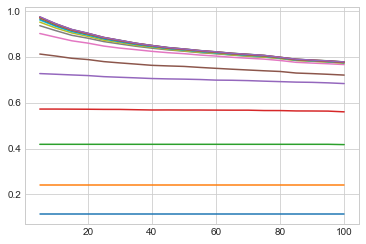

In [101]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
for d1, d2 in enumerate(MAX_DEPTH):
      ax.plot(MIN_SPLIT, train_accuracy[d1,])
       
plt.show()

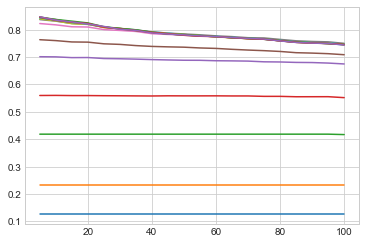

In [102]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
for d1, d2 in enumerate(MAX_DEPTH):
      ax.plot(MIN_SPLIT, test_accuracy[d1,])
       
plt.show()

In [108]:
print(train_accuracy.min())
print(train_accuracy.max())

print(test_accuracy.min())
print(test_accuracy.max())

0.11301666666666667
0.9737166666666667
0.1258
0.8473


### Random Forest (Tree-based Method)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [13]:
encoder = LabelEncoder()
encoded_train_labels = pd.Series(encoder.fit_transform(train_labels))

First we would like to fit the model. We use 

In [14]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
rf.fit(train_images, encoded_train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

Then we would like to see the the prediction error for both training data set and test data set

In [15]:
train_predictions = np.rint(rf.predict(train_images))
print(train_predictions)

[5. 0. 4. ... 5. 6. 8.]


In [18]:
np.trace(confusion_matrix(train_labels, train_predictions))/np.sum(confusion_matrix(train_labels, train_predictions))

0.86095

In [19]:
predictions = np.rint(rf.predict(test_images))
print(predictions)

[7. 2. 1. ... 4. 5. 6.]


In [20]:
np.trace(confusion_matrix(test_labels, predictions))/np.sum(confusion_matrix(test_labels, predictions))


0.7274

Similarly, we would like to see the influence of some parameters. For this mothod, we mainly will look at the influence of number of tree we build in the forest, ie n_estimators here in the previous example. 

In [24]:
NUM_tree = range(1, 20, 2)
print(NUM_tree)

range(1, 20, 2)


In [25]:
train_accuracy = np.empty((len(NUM_tree)))
test_accuracy = np.empty((len(NUM_tree)))


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [26]:
for i, j in enumerate(NUM_tree): 
    rf = RandomForestRegressor(n_estimators = j, random_state = 42)
    rf.fit(train_images, encoded_train_labels)
    
    
    train_predictions = np.rint(rf.predict(train_images))
    train_accuracy[i] = np.trace(confusion_matrix(train_labels, train_predictions))/np.sum(confusion_matrix(train_labels, train_predictions))
    
    predictions = np.rint(rf.predict(test_images))
    test_accuracy[i] = np.trace(confusion_matrix(test_labels, predictions))/np.sum(confusion_matrix(test_labels, predictions))


In [27]:
print(train_accuracy)
print(test_accuracy)

[0.93488333 0.87498333 0.85991667 0.85081667 0.85548333 0.86456667
 0.8718     0.8739     0.87551667 0.8762    ]
[0.8317 0.7439 0.7354 0.7242 0.7234 0.7308 0.7362 0.738  0.7392 0.7425]


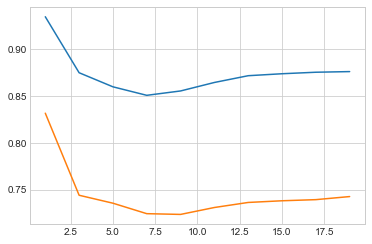

In [28]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.plot(NUM_tree, train_accuracy)
ax.plot(NUM_tree, test_accuracy)
plt.show()

In [30]:
print("Training Set: (min, max): (", train_accuracy.min(), train_accuracy.max(), ")")
print("Test Set: (min, max): (", test_accuracy.min(), test_accuracy.max(), ")")

Training Set: (min, max): ( 0.8508166666666667 0.9348833333333333 )
Test Set: (min, max): ( 0.7234 0.8317 )


## AdaBoost

Next, we would like to use AdaBoost to conduct this work. 

In [109]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [ ]:
# Initialize data set
train_images = train_images_bp
train_labels = train_labels_bp
test_images = test_images_bp
test_labels = test_labels_bp

In [110]:
encoder = LabelEncoder()
encoded_train_labels = pd.Series(encoder.fit_transform(train_labels))
# print(encoded_train_labels)

Then we can fit AdaBoost model. max_depth option tells our model that we’d like our forest to be composed of trees with a single decision node and two leaves. n_estimators tells out model that we would like to build the number of trees in the model. 

In [137]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=200
)
classifier.fit(train_images, encoded_train_labels)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

Similarly, as for performance criteria, we use test data prediction accuracy and test data prediction accuracy. First, let's take a look at the trianing data prediction accuracy: 

In [138]:
train_predictions = classifier.predict(train_images)

In [139]:
np.trace(confusion_matrix(train_labels, train_predictions))/np.sum(confusion_matrix(train_labels, train_predictions))

0.9187333333333333

Then we can look at test data prediction accuracy: 

In [140]:
predictions = classifier.predict(test_images)

In [141]:
predictions = classifier.predict(test_images)
print(predictions)

[7 2 1 ... 4 5 6]


We can also take a look at the confusion matrix for test data set prediction: 

In [142]:
confusion_matrix(test_labels, predictions)

array([[ 915,    0,    4,    0,    0,   42,   11,    1,    5,    2],
       [   0, 1107,    2,    2,    1,    1,    2,    1,   19,    0],
       [   8,    3,  874,   32,    8,   11,   35,    8,   49,    4],
       [   4,    0,   14,  900,    2,   37,    5,   10,   31,    7],
       [   1,    0,    8,    2,  867,    1,    3,    5,    7,   88],
       [   6,    4,    1,   55,    3,  749,   14,    3,   44,   13],
       [   7,    4,    8,    3,   13,   11,  899,    1,   12,    0],
       [   1,    6,   16,   10,    9,    1,    0,  913,    8,   64],
       [   8,    0,    9,   38,    3,   20,    8,    6,  866,   16],
       [   3,    7,    4,   14,   46,    3,    0,   27,   18,  887]])

Calculation of predicition accuracy on test data set

In [143]:
np.trace(confusion_matrix(test_labels, predictions))/np.sum(confusion_matrix(test_labels, predictions))

0.8977

Notice that we are using two parameters here, max_depth and n_estimators. We then, would like to investigate the influnce these two parameters. Due to the limitation of my PCs capacity, 

In [126]:
max_depth_range = np.arange(2, 5) 
n_estimators_range = np.arange(1, 20, 2)

In [127]:
train_accuracy = np.empty((len(max_depth_range),len(n_estimators_range)))
test_accuracy = np.empty((len(max_depth_range),len(n_estimators_range))) 
print(max_depth_range)
print(n_estimators_range)

[2 3 4]
[ 1  3  5  7  9 11 13 15 17 19]


In [128]:
# Loop over different max_depth values and n_estimators 
for i, j in enumerate(max_depth_range): 
    for k, l in enumerate(n_estimators_range): 
        classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=j),n_estimators =l)
        classifier.fit(train_images, encoded_train_labels)
        
        train_predictions = classifier.predict(train_images)
        predictions = classifier.predict(test_images)
        
        train_accuracy[i, k] = np.trace(confusion_matrix(train_labels, train_predictions))/np.sum(confusion_matrix(train_labels, train_predictions))
        test_accuracy[i, k] = np.trace(confusion_matrix(test_labels, predictions))/np.sum(confusion_matrix(test_labels, predictions))
        print(j)

2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4


In [130]:
print(train_accuracy)
print(test_accuracy)

[[0.34181667 0.53465    0.63716667 0.67616667 0.69975    0.72178333
  0.7365     0.74256667 0.73713333 0.76285   ]
 [0.49151667 0.64983333 0.73748333 0.78385    0.79381667 0.81006667
  0.81683333 0.8257     0.82696667 0.83261667]
 [0.58988333 0.76326667 0.8045     0.80875    0.81968333 0.8278
  0.83345    0.83018333 0.8319     0.82905   ]]
[[0.3447 0.5393 0.6329 0.6705 0.7023 0.7239 0.7383 0.7451 0.7411 0.7657]
 [0.4953 0.6497 0.7408 0.7791 0.7915 0.8082 0.8164 0.8231 0.825  0.8324]
 [0.5957 0.7663 0.8051 0.8101 0.8184 0.8257 0.8366 0.8349 0.8331 0.8273]]


We can also visualize these values instead of staring at these numbers. Instead of looking at accuracy within training data and test data, we compare between training data and test data. 

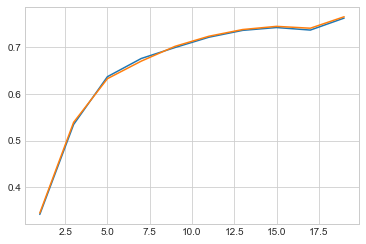

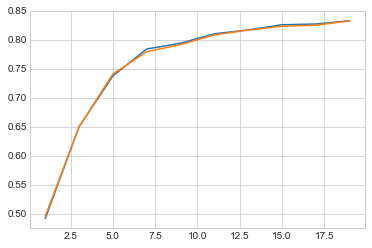

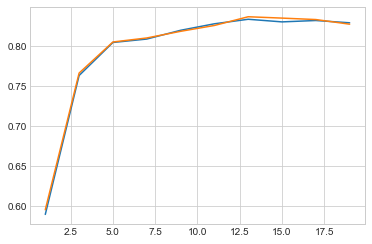

In [131]:
for d1, d2 in enumerate(max_depth_range):
      plt.style.use('seaborn-whitegrid')
      fig = plt.figure()
      ax = plt.axes()
      ax.plot(n_estimators_range, train_accuracy[d1,])
      ax.plot(n_estimators_range, test_accuracy[d1,])
      plt.show()

As we can see from these three plots, when we fix max_depth_range, the predcition accuracy for train and test data sets are increasing. So far, due to the small range of the values, there might be no overfitting in all these cases. But still if the computational ability is satisfied, we need to perform on a larger range of situations. 

In [136]:
for d1, d2 in enumerate(max_depth_range):
    print("Trianing Accuracy Min is: ", train_accuracy[d1,].min(), "." "Max is: ", train_accuracy[d1,].max())

for d1, d2 in enumerate(max_depth_range):
    print("Test Accuracy Min is: ", test_accuracy[d1,].min(), "." "Max is: ", test_accuracy[d1,].max())   

Trianing Accuracy Min is:  0.34181666666666666 .Max is:  0.76285
Trianing Accuracy Min is:  0.49151666666666666 .Max is:  0.8326166666666667
Trianing Accuracy Min is:  0.5898833333333333 .Max is:  0.83345
Test Accuracy Min is:  0.3447 .Max is:  0.7657
Test Accuracy Min is:  0.4953 .Max is:  0.8324
Test Accuracy Min is:  0.5957 .Max is:  0.8366


## Conclusions

In this homework, we used multiple machine learning and deep learning methods to predict MNIST data set. Methods that we are using include Nerual Network, KNN, SVM (Support Vector Machine), Random Forest, AdaBoost. We use predicition accuracy on both test dataset and training data set as our criteria. After fitting these models, we can summarize results as follow: 

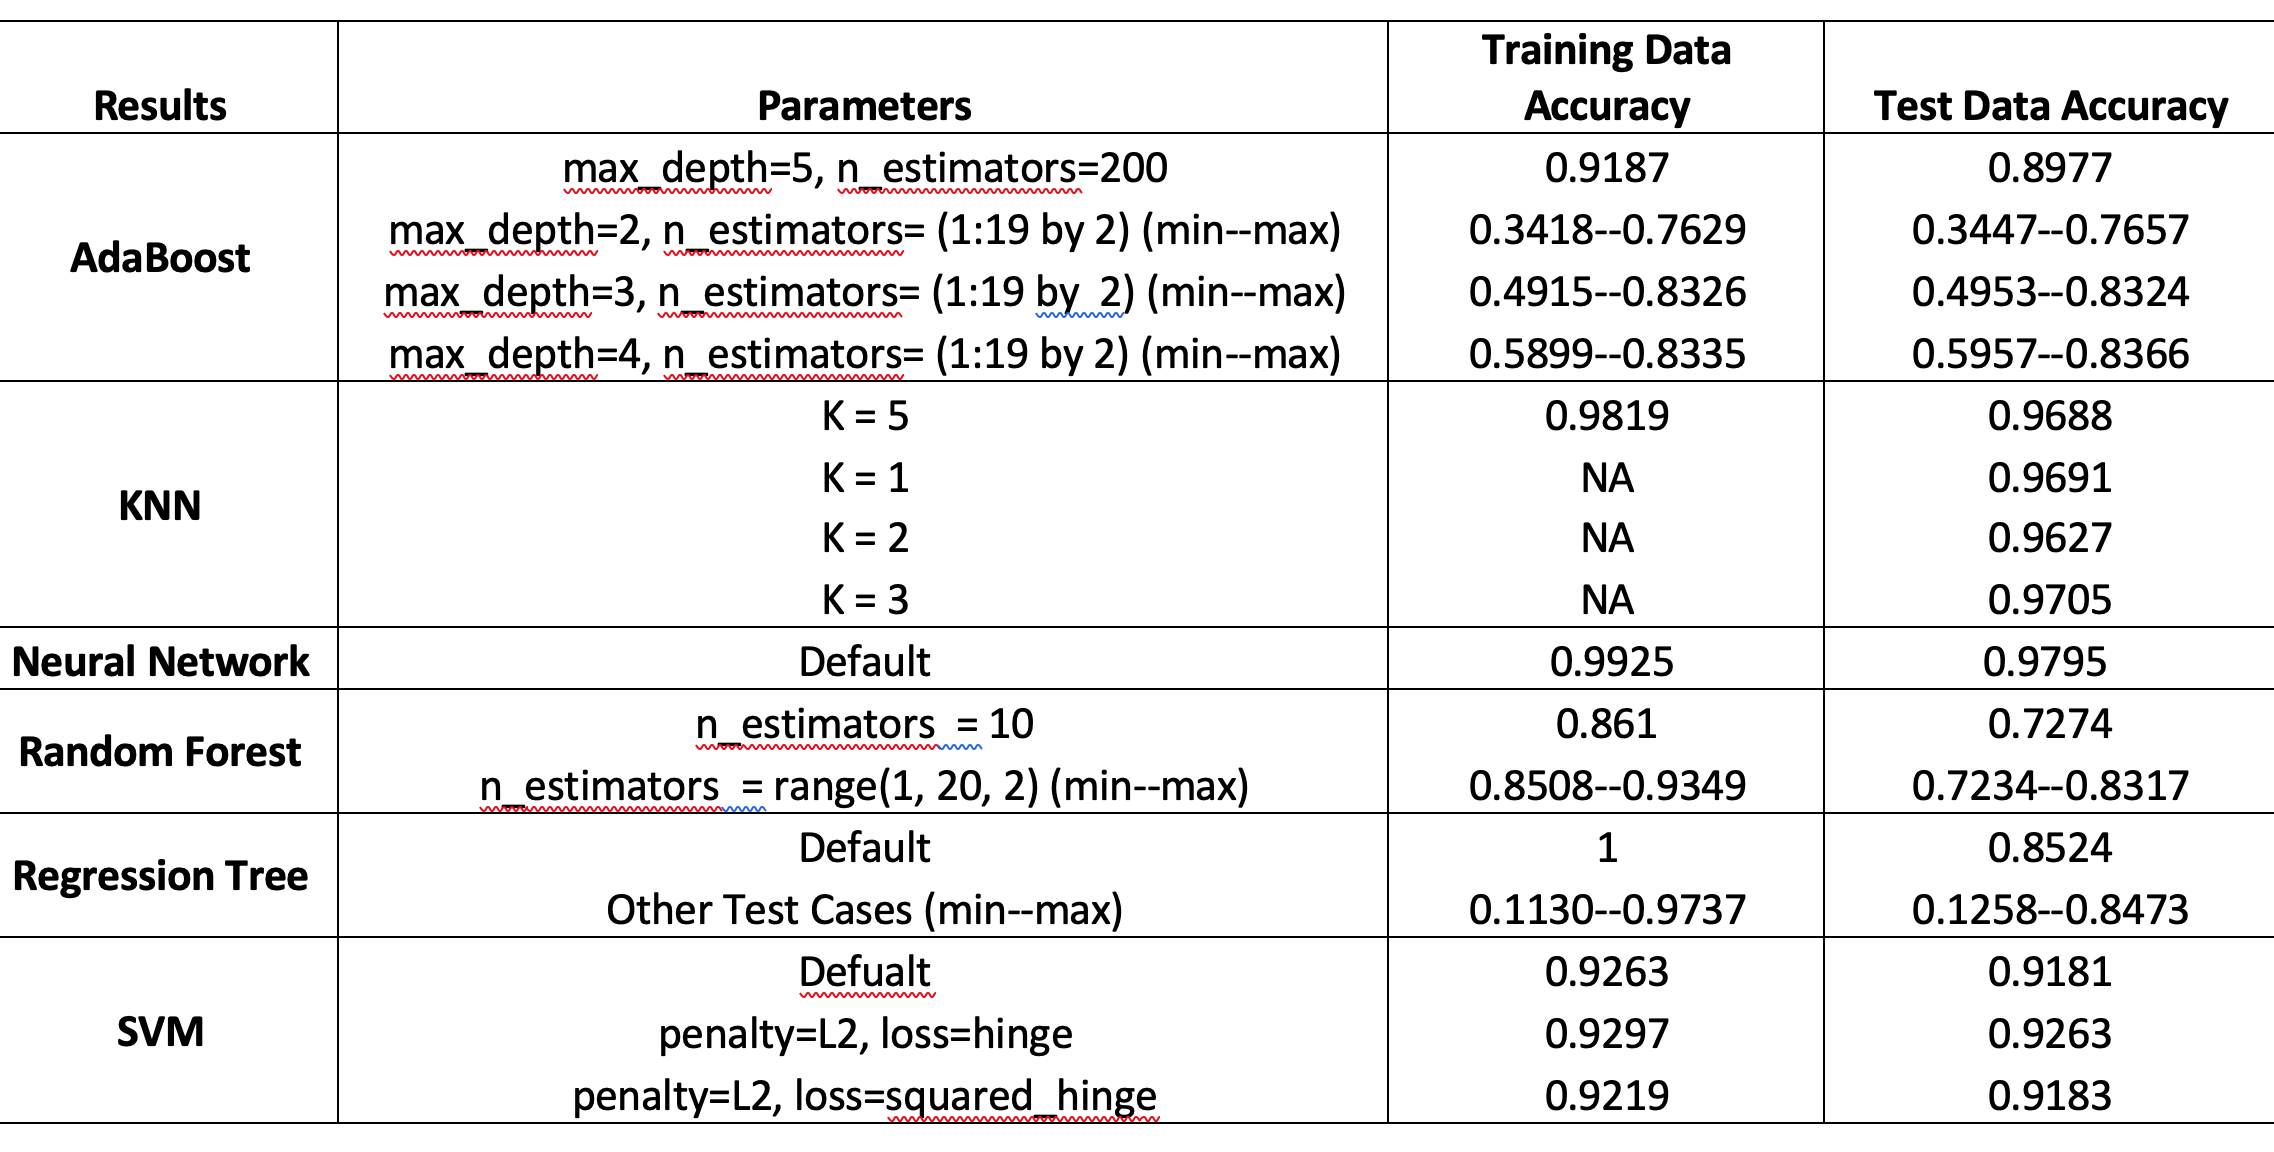

In [3]:
from IPython.display import Image
Image(filename="./Results.png")


Comparsion among these models, neural network outperformed all the other methods both in training data accuracy and test data accuracy. Next, KNN seems perform very well. Then SVM also yields a accuracy of over 90%. The rest methods do not perform very well in this example. 

However, this is not the "Best" results for each method. Because the ability of the my Mac, we can only simulate a certain amount of situations over a limitted range of tunning parameters. 

As the goal of this homework is to practice more on how to fit machine learning methods. According to Wikipedia of MNIST data set (https://en.wikipedia.org/wiki/MNIST_database), this problem can be already solved with a very high prediction accuracy using both traditional machine learning methods as well as nerual network methods. The following is the table of best of performance of using each method. 

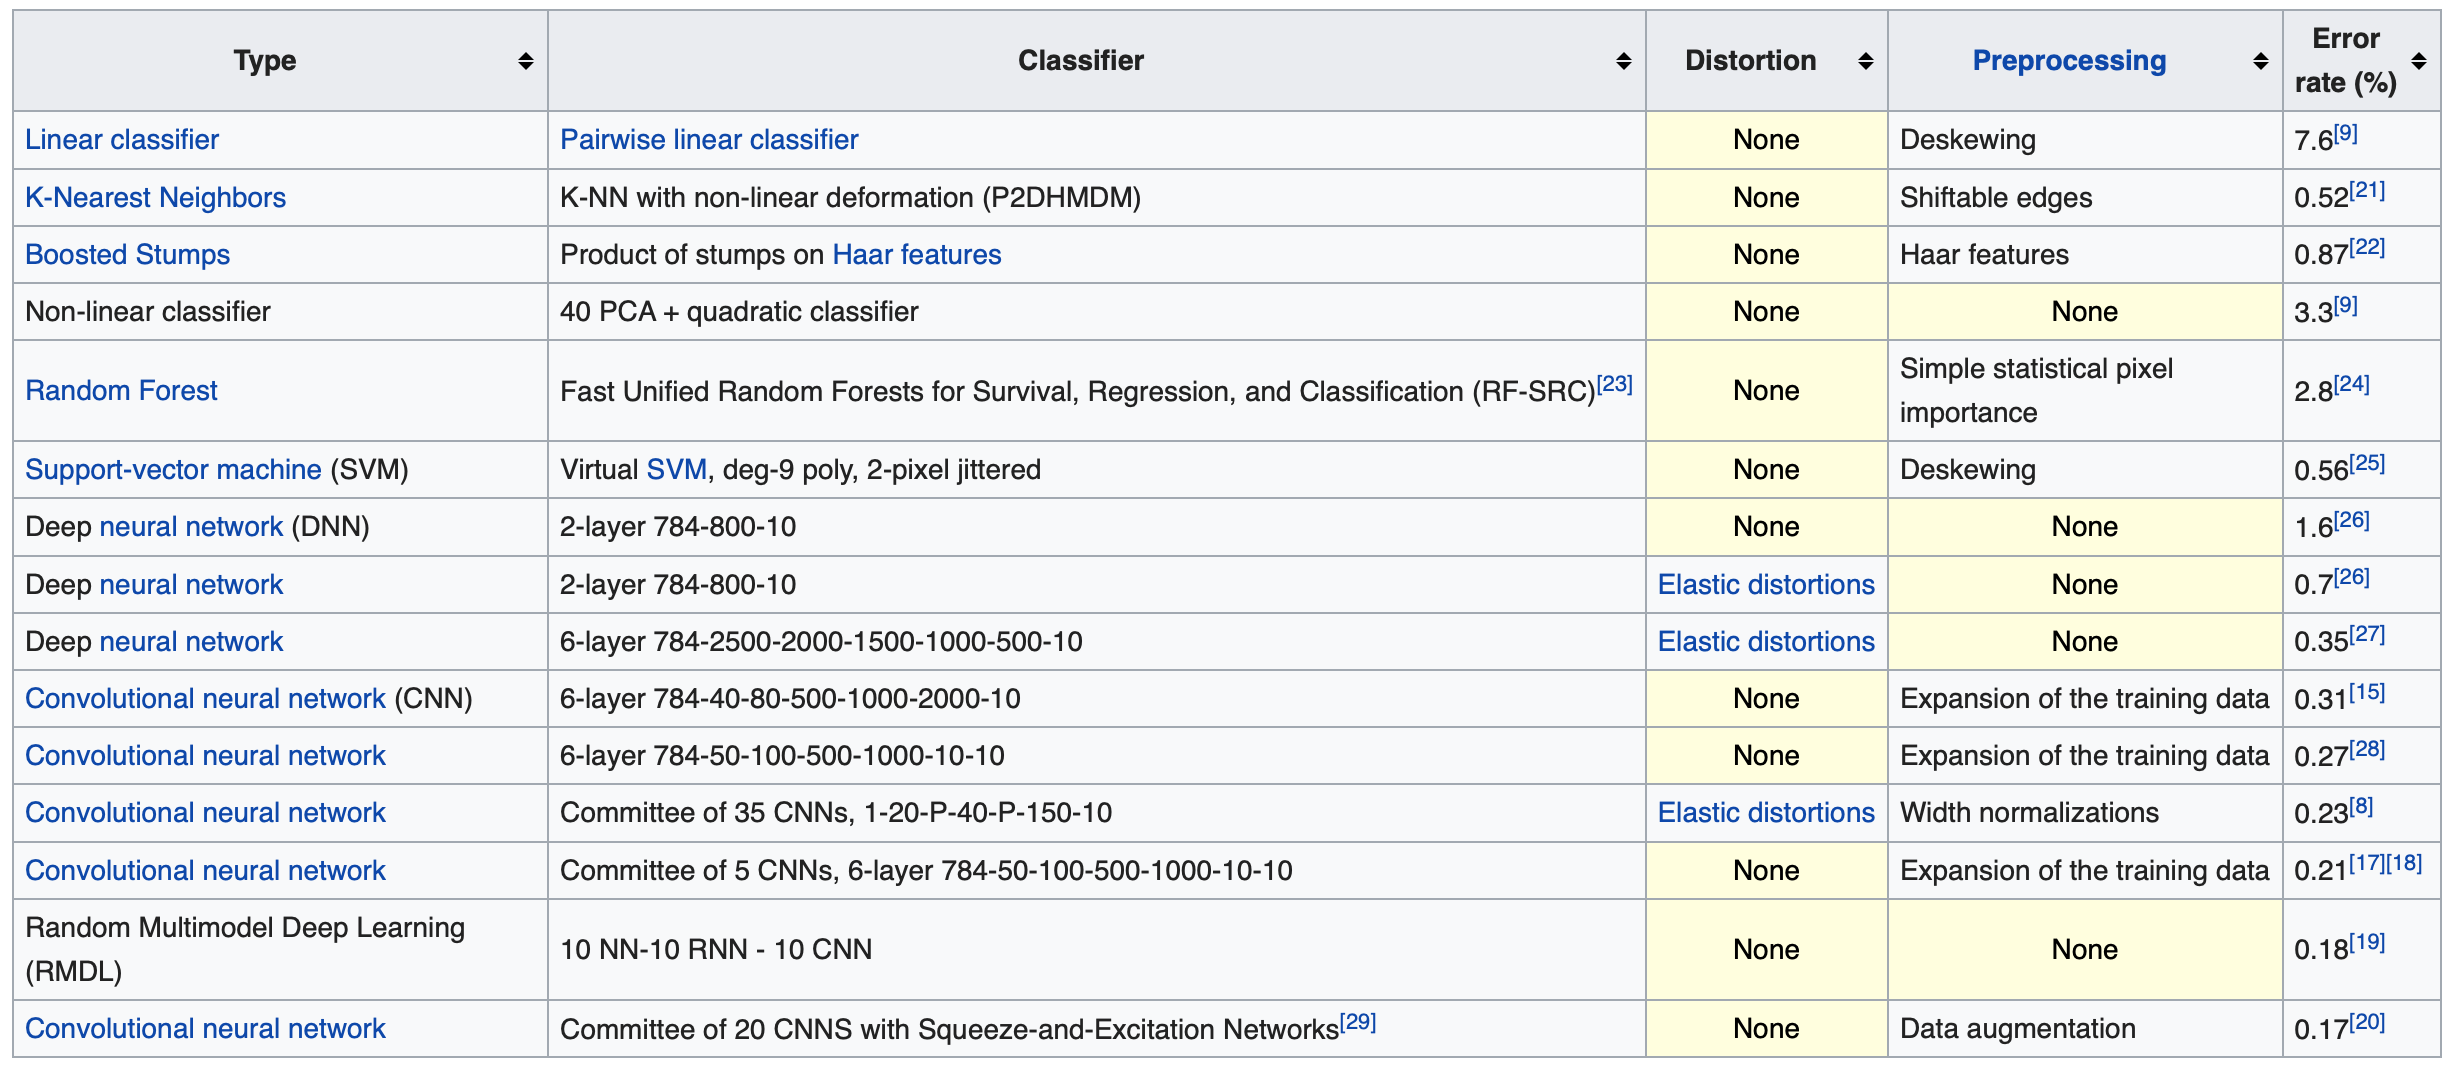

In [4]:
from IPython.display import Image
Image(filename="./Wiki.png")